In [17]:
#Lucas Ross 28 Mar 2023

#import libraries
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [18]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

df = pd.read_csv("credit.csv")

df.head(10) #several missing values
#columns like job and housing can be one-hot encoded, but others like checking_balance can be categorized

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [19]:
df.info() #strings need to be converted to categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [20]:
for feature in df.columns:
    if df[feature].dtype == "object": #take all object types and convert to categorical
        df[feature] = pd.Categorical(df[feature]) #replace strng with integer
        print(df[feature].value_counts())
        print("-" * 50)

unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64
--------------------------------------------------
good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64
--------------------------------------------------
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64
--------------------------------------------------
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64
--------------------------------------------------
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64
--------------------------------------------------
none     814
bank     139
store     47
Name:

In [21]:
#custom values for one-hot encoding
replace = {
    "checking_balance": {"< 0 DM": 1, "1 - 200 DM": 2, "> 200 DM": 3, "unknown":-1},
    "credit_history": {"critical": 1, "poor": 2, "good": 3, "very good": 4, "perfect": 5},
    "savings_balance": {"< 100 DM": 1, "100 - 500 DM": 2, "500 - 1000 DM": 3, "> 1000 DM" : 4, "unknown":-1},
    "employment_duration": {"unemployed": 1, "< 1 year": 2, "1 - 4 years": 3, "4 - 7 years": 4, "> 7 years": 5},
    "job" : {"unemployed": 1, "unskilled": 2, "skilled": 3, "management": 4},
    "default": {"no" : 0, "yes": 1},
    "phone": {"no" : 0, "yes": 1}
}

cols = ["purpose", "housing", "other_credit", "job"]

In [22]:
df = df.replace(replace)
df = pd.get_dummies(df, columns = cols)
df.head(5)

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,dependents,phone,default,purpose_business,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,housing_other,housing_own,housing_rent,other_credit_bank,other_credit_none,other_credit_store,job_4,job_3,job_1,job_2
0,1,6,1,1169,-1,5,4,4,67,2,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
1,2,48,3,5951,1,3,2,2,22,1,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
2,-1,12,1,2096,1,4,2,3,49,1,2,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
3,1,42,3,7882,1,4,2,4,45,1,2,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0
4,1,24,2,4870,1,3,3,4,53,2,2,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


In [23]:
#split into x and y
x = df.drop("default", axis=1)
y = df.default

In [24]:
#train-test split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state=1)

In [25]:
#create + fit model
dt = DecisionTreeClassifier(criterion="gini", random_state=1)
dt.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=1)

In [26]:
#get accuracy score
dt.score(xtest, ytest) #69.3%

0.6933333333333334

In [27]:
def make_confusion_matrix(model, yreal, labels=[1,0]):
    ypredict = model.predict(xtest)
    cm = metrics.confusion_matrix(yreal, ypredict, labels=[0, 1])
    print(cm)
    cm_percent = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_percent, annot=True, fmt=".2%", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["True 0", "True 1"])
    plt.ylabel("True")
    plt.xlabel("Predicted")
    plt.show()

[[168  46]
 [ 46  40]]


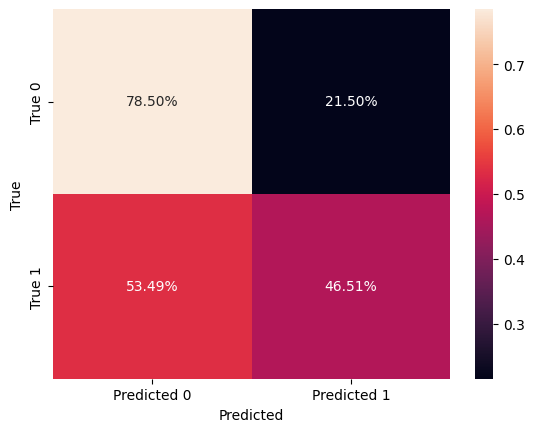

In [28]:
make_confusion_matrix(dt, ytest)

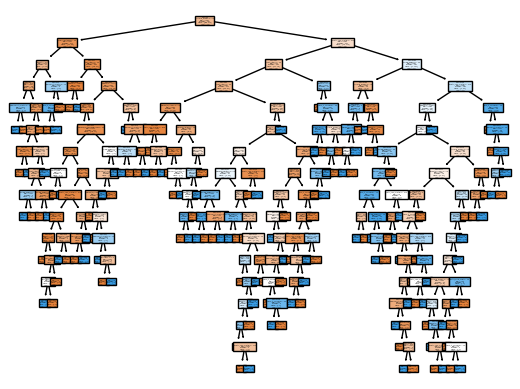

In [29]:
_ = tree.plot_tree(dt,
    feature_names=df.columns,
    node_ids=True,
    class_names=True,
    filled=True)

In [30]:
print(tree.export_text(dt, feature_names=x.columns, show_weights=True))

ValueError: The truth value of a Index is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().